# Step 0: Python Libraries and Dataset

In [3]:
# First we need to load all required dependencies to load and analyze the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Now need to load data through pandas library because we would need two-dimensional labeled data structure.
diabetes_data = pd.read_csv('diabetes.csv')

# Step 1: Exploratory Data Analysis

In [5]:
# Need to check further details to read and understand the data with row and column details.
# Data Understanding
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0.0,33.6,0.627,50,1
1,1,NaN,66,29,0.0,26.6,0.351,31,0
2,8,183.0,64,0,0.0,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1
5,5,116.0,74,0,NaN,25.6,NaN,30,0
6,3,78.0,50,32,88.0,31.0,0.248,26,1
7,10,115.0,0,0,0.0,35.3,0.134,29,0
8,2,197.0,70,45,543.0,30.5,0.158,53,1
9,8,125.0,96,0,0.0,0.0,0.232,54,1


In [18]:
# now as per above output we can see few data is coming as NaN which we have to clean it for data analysis.

In [6]:
# Need to identify whethere null value exist in any column or not
# Data understanding
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure               False
SkinThickness               False
Insulin                      True
BMI                         False
DiabetesPedigreeFunction     True
Age                         False
Outcome                     False
dtype: bool

In [7]:
# as per above output we can see clearly the occurence of null values corresponding to columns is showing True.
# at row 1 - under column Glucose, it means null value does exist in this csv file.
diabetes_data.shape

(769, 9)

In [8]:
# we can also use below query to identify whether there is any null value corresponding to column, doest exist or not.
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   766 non-null    float64
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   766 non-null    float64
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.2 KB


In [1]:
# in above output we can see out of 768 rows glucose has 766 non-null value and 3 is null value 

# simmilar to Insulin & DiabetesPedigreeFunction

In [9]:
# To check whether duplicate value does exist or not.
diabetes_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
764    False
765    False
766    False
767    False
768     True
Length: 769, dtype: bool

In [10]:
# as per above its clearly visible at index 768 duplicates are there?
# I'll not be considering all columns for duplicates rather specific column which i'm using for data analysis.

column_names = ['Pregnancies','Glucose', 'Insulin','BMI','Age']
duplicates = diabetes_data.duplicated(subset=column_names, keep = False)
diabetes_data[duplicates]
# here keep = false means all(false) duplicate values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76,48,180.0,32.9,0.171,63,0
768,10,101.0,76,48,180.0,32.9,0.171,63,0


In [ ]:
# Its clearly visible that duplicate values are present at row 763 & 768

In [ ]:
# Now to conclude this from cleaning perspective we just have to remove the NaN value from the data set.
# Data Cleaing processing has been started.

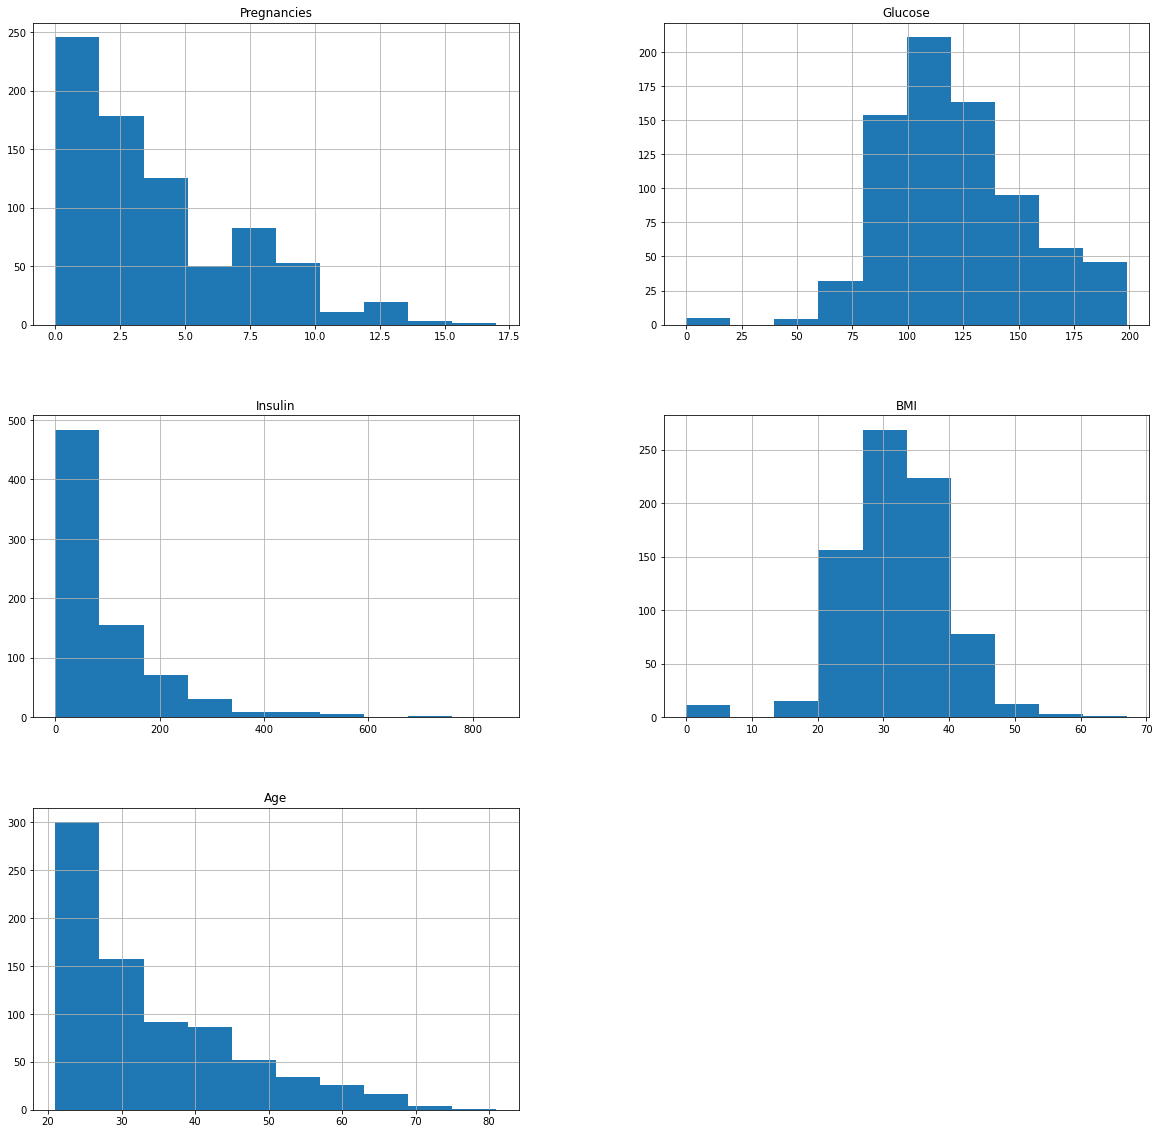

In [11]:
# Data Visualization before removing the null values
column_names = ['Pregnancies','Glucose', 'Insulin','BMI','Age']
p = diabetes_data.hist(column_names,figsize = (20,20))

# Step 2: Data Cleaning

In [12]:
# Data Cleaning 

# First I'm cleaning NaN values, there are many ways but considering NaN value is very less so by dropping NaN value will
# not impact the data set as its less than 10% of total dataset
diabetes_data = diabetes_data.dropna(axis=0)
print(diabetes_data)
diabetes_data.head(30)

# considering only axis =0 as its dropping only 4 rows so total we would have 765.

# axis = 1 will drop 3 column and that's not recommended as most of the data will get lost.


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35      0.0  33.6   
2              8    183.0             64              0      0.0  23.3   
3              1     89.0             66             23     94.0  28.1   
4              0    137.0             40             35    168.0  43.1   
6              3     78.0             50             32     88.0  31.0   
..           ...      ...            ...            ...      ...   ...   
764            2    122.0             70             27      0.0  36.8   
765            5    121.0             72             23    112.0  26.2   
766            1    126.0             60              0      0.0  30.1   
767            1     93.0             70             31      0.0  30.4   
768           10    101.0             76             48    180.0  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0.0,33.6,0.627,50,1
2,8,183.0,64,0,0.0,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1
6,3,78.0,50,32,88.0,31.0,0.248,26,1
7,10,115.0,0,0,0.0,35.3,0.134,29,0
8,2,197.0,70,45,543.0,30.5,0.158,53,1
9,8,125.0,96,0,0.0,0.0,0.232,54,1
10,4,110.0,92,0,0.0,37.6,0.191,30,0
11,10,168.0,74,0,0.0,38.0,0.537,34,1


In [13]:
# Secondly now need to remove duplicates as well.
column_names = ['Pregnancies','Glucose', 'Insulin','BMI','Age']
diabetes_data = diabetes_data.drop_duplicates(subset=column_names)
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35      0.0  33.6   
2              8    183.0             64              0      0.0  23.3   
3              1     89.0             66             23     94.0  28.1   
4              0    137.0             40             35    168.0  43.1   
6              3     78.0             50             32     88.0  31.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48    180.0  32.9   
764            2    122.0             70             27      0.0  36.8   
765            5    121.0             72             23    112.0  26.2   
766            1    126.0             60              0      0.0  30.1   
767            1     93.0             70             31      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                  

In [14]:
diabetes_data.shape
# Now finally after cleaning all data, we have total 764 rows and 9 columns

(764, 9)

In [15]:
# Also we can see a lot of zero values which we need to replace with NaN first.

diabetes_data[["Pregnancies", "Glucose","Insulin","BMI","Age"]] = diabetes_data[["Pregnancies", "Glucose","Insulin","BMI","Age"]].replace(0,np.NaN)

diabetes_data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     371
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
# Now replacing NaN with mean data as after converting zero to NaN, this value has become huge so dropping row
# would not suffice.

# we are not using all columns for data analysis so we are not cleaning data for all columns.

diabetes_data["Pregnancies"].fillna(diabetes_data["Pregnancies"].mean(), inplace = True)
diabetes_data["Glucose"].fillna(diabetes_data["Glucose"].mean(), inplace = True)
diabetes_data["Insulin"].fillna(diabetes_data["Insulin"].mean(), inplace = True)
diabetes_data["BMI"].fillna(diabetes_data["BMI"].mean(), inplace = True)
diabetes_data["Age"].fillna(diabetes_data["Age"].mean(), inplace = True)

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72,35,155.732824,33.600000,0.627,50,1
2,8.000000,183.0,64,0,155.732824,23.300000,0.672,32,1
3,1.000000,89.0,66,23,94.000000,28.100000,0.167,21,0
4,4.499234,137.0,40,35,168.000000,43.100000,2.288,33,1
6,3.000000,78.0,50,32,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,0,0,155.732824,35.300000,0.134,29,0
8,2.000000,197.0,70,45,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96,0,155.732824,32.456042,0.232,54,1
10,4.000000,110.0,92,0,155.732824,37.600000,0.191,30,0
11,10.000000,168.0,74,0,155.732824,38.000000,0.537,34,1


# Step 3: Data Visualization

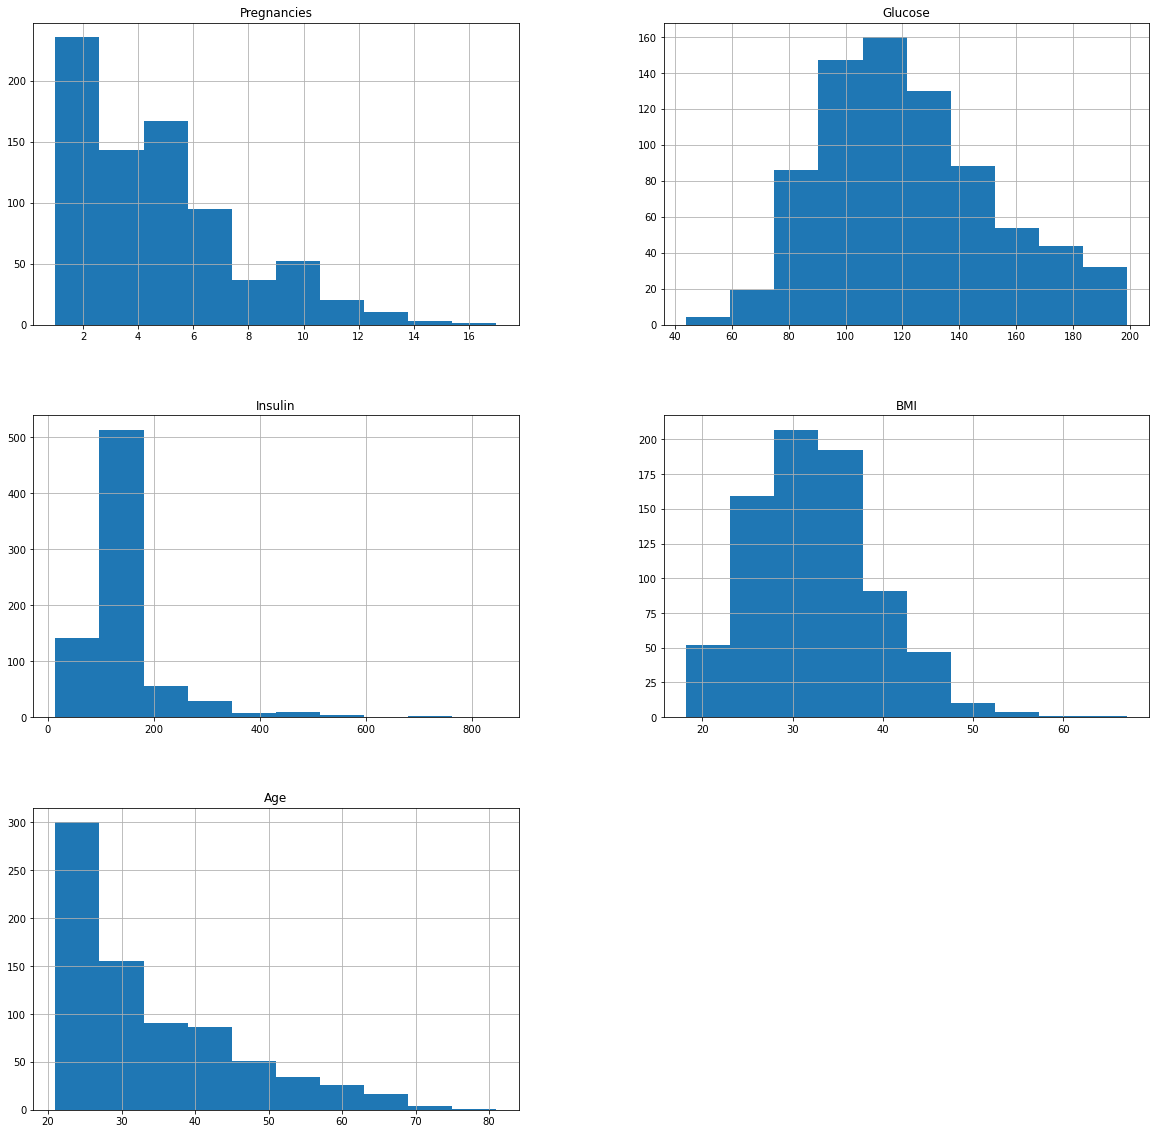

In [17]:
diabetes_data
# Data Visualization after removing the null values
column_names = ['Pregnancies','Glucose', 'Insulin','BMI','Age']
p = diabetes_data.hist(column_names,figsize = (20,20))

In [ ]:
# Conclusion : So here we have seen the distribution of each features and why do we need this? simple answer would be to start
# the analysis of the dataset as it shows the occurence of every kind of value in the graphical structure which help us to know the
# range of data

# After analysis of this hist plot before and after cleaning of data we can clearly say we are using this visualization
# to see the changes that we can see after those 0 converted to NaN values are removed from the dataset and we can clearly see
# the difference in BMI & Insulin etc...

(764,) (764,)
(764, 1)


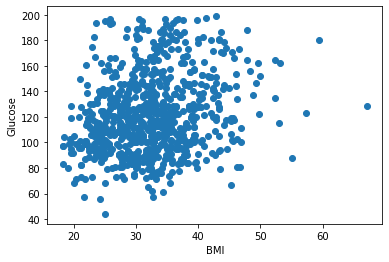

In [18]:
# Lets analyze some data and little bit comparison in between the values.

feature = diabetes_data.drop('Glucose', axis=1)
y_outcome = diabetes_data['Glucose'].values
X_bmi = feature.iloc[:, 4].values
print (y_outcome.shape, X_bmi.shape)

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

plt.scatter(X_bmi, y_outcome)
plt.ylabel("Glucose")
plt.xlabel("BMI")
plt.show()


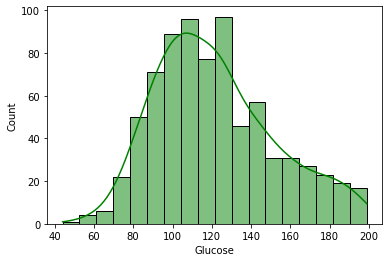

In [19]:
# With this visualization we can clearly say that as BMI increases Glocuose level is also tend to increase. Lets understand this with 
# another analysis as well.

sns.histplot(diabetes_data['Glucose'], kde=True, color='green')
plt.show()

#blood sugar level as below
#1. Till 140 we consider normal
#2. In between 140 to 190 we consider as prediabetes 
#3. greater than 190 we consider diabetes.

In [ ]:
# we have greater count in between 30 to 140, and then less count in between 140 to 190 and there is less data greater than 190

In [ ]:
# count plot just to see whther dataset is balanced or not.

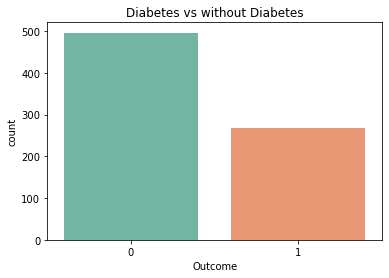

In [20]:
sns.countplot(x='Outcome', data=diabetes_data, palette='Set2')
plt.title('Diabetes vs without Diabetes')
plt.show()

In [ ]:
# By visualizing we can say people who don't have the diabetes is more than which do have diabetes. it seems data is unbalanced.

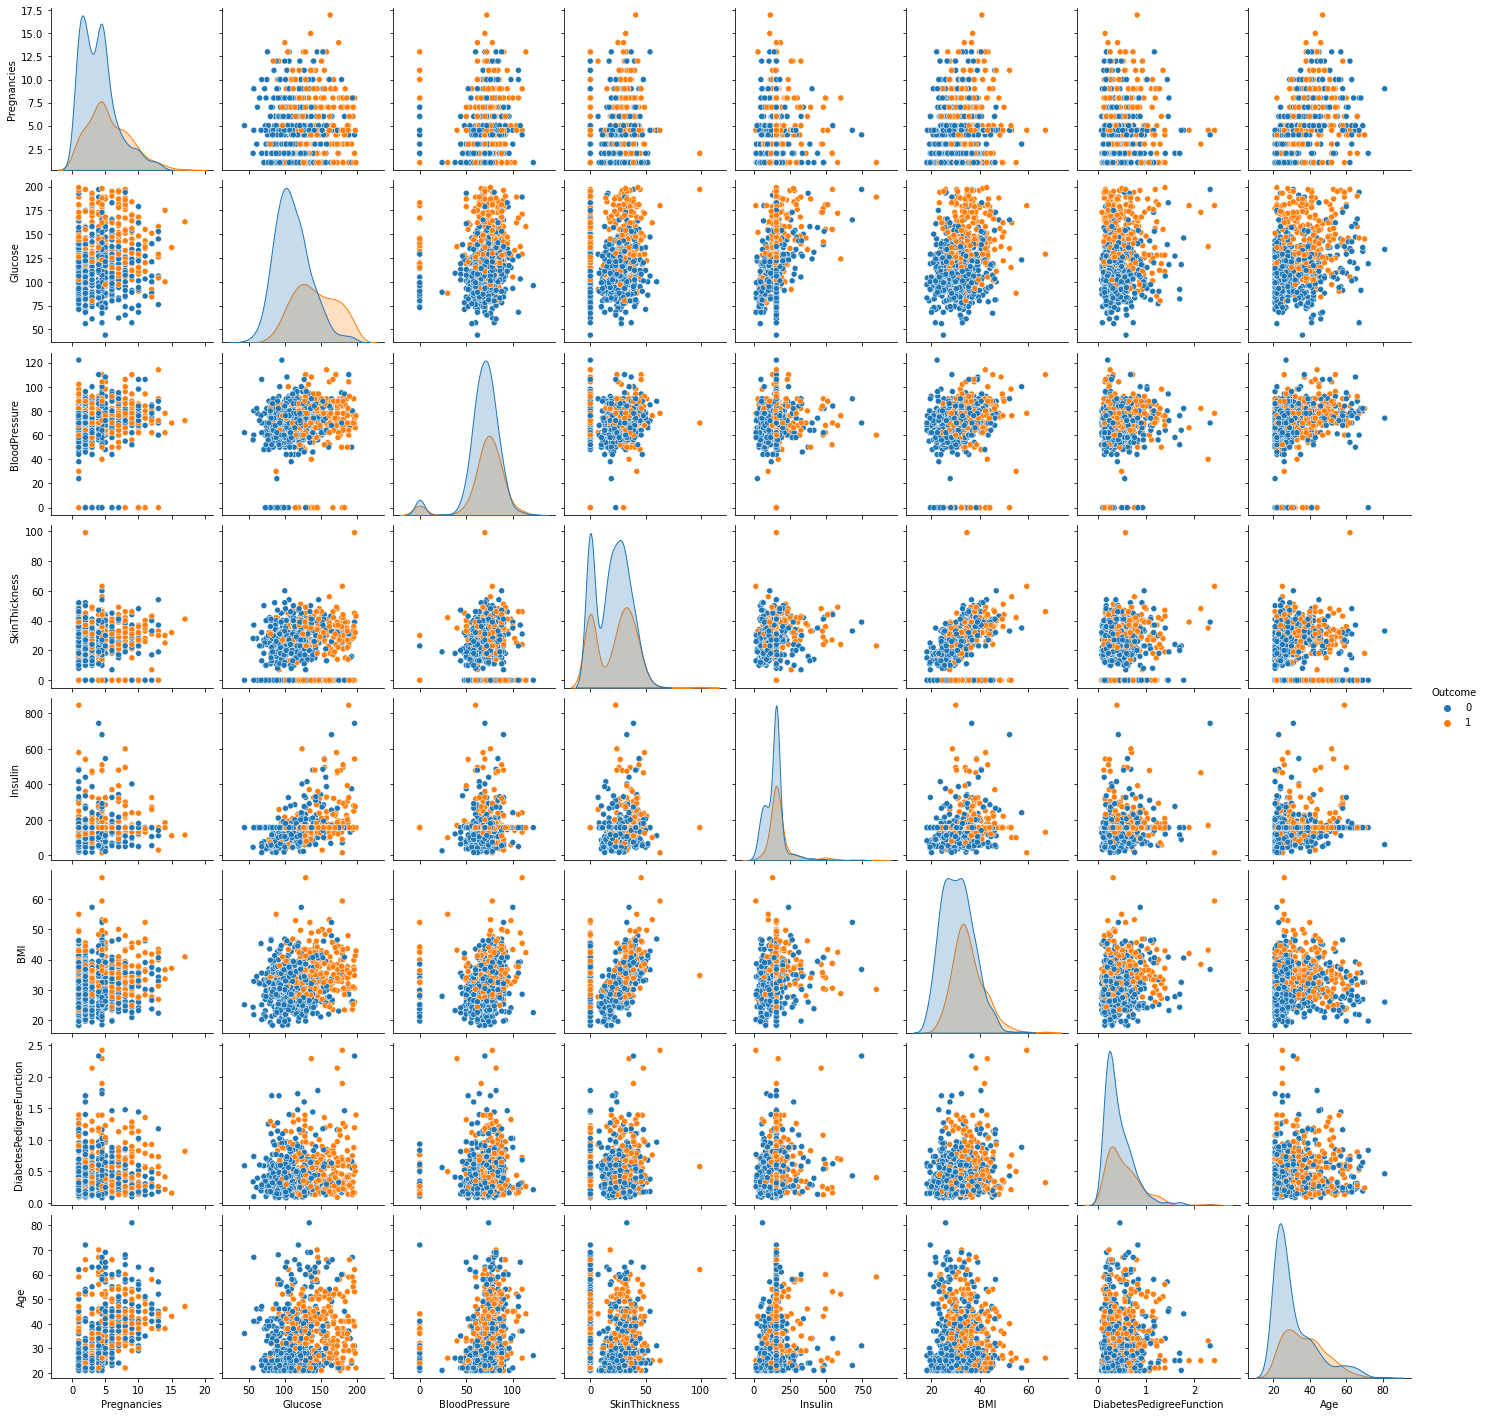

In [21]:
sns.pairplot(hue='Outcome', data=diabetes_data)
plt.show()

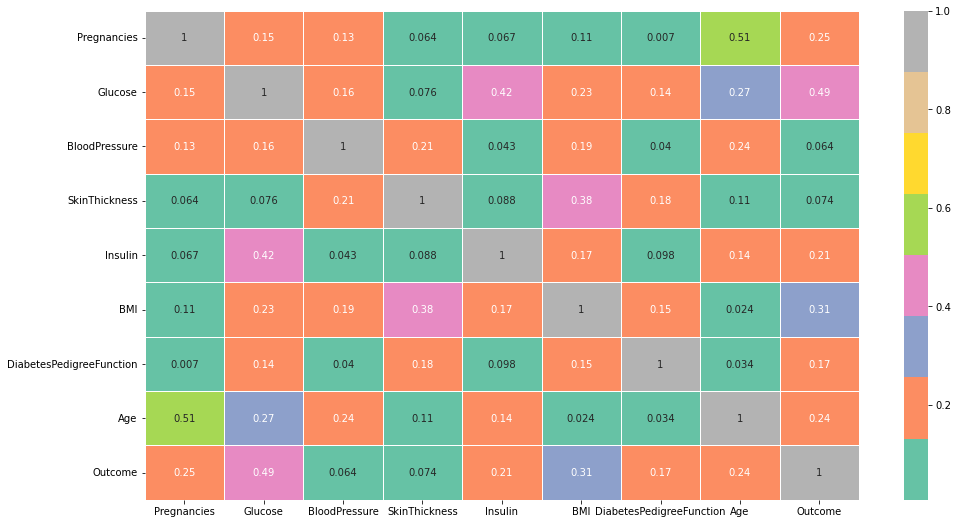

In [22]:
# Correlation

plt.figure(figsize=(16,9))
corr = diabetes_data.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

In [ ]:
# Its clearly visible that the most correlates with the outcome is "GLUCOSE" & "BMI" with a value of 0.49 while the lowest corelation is 
# skinthicness and BloodPressure.

# we have also done some Analsyis in between Glucose and BMU, If BMI increases Glucose also tend to increase and could be the 
# reason of Diabetes.

# Step 4: Data Modelling

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [24]:
# Declare feature and target variable
X = diabetes_data.drop(['Outcome','BloodPressure','SkinThickness','DiabetesPedigreeFunction'],axis=1)
y = diabetes_data['Outcome']
print(X)
print(y.shape)

     Pregnancies  Glucose     Insulin   BMI  Age
0       6.000000    148.0  155.732824  33.6   50
2       8.000000    183.0  155.732824  23.3   32
3       1.000000     89.0   94.000000  28.1   21
4       4.499234    137.0  168.000000  43.1   33
6       3.000000     78.0   88.000000  31.0   26
..           ...      ...         ...   ...  ...
763    10.000000    101.0  180.000000  32.9   63
764     2.000000    122.0  155.732824  36.8   27
765     5.000000    121.0  112.000000  26.2   30
766     1.000000    126.0  155.732824  30.1   47
767     1.000000     93.0  155.732824  30.4   23

[764 rows x 5 columns]
(764,)


# K-NN Supervised Learning

In [25]:
# Now Data Modeling will get started
# KNN or K-NN Supervised learning will get into the picture.
# sklearn model performance
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7869565217391304


In [27]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(knn_accuracy * 100))

Accuracy: 78.69565217391305


In [28]:
# Model complexity and over/underfitting

# here we are trying to feed different neighbor value just to check the model predictions and 

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(test_accuracies)

# n_neighbors 7 has max accuracy


{1: 0.6826086956521739, 2: 0.7043478260869566, 3: 0.7391304347826086, 4: 0.7478260869565218, 5: 0.7434782608695653, 6: 0.7608695652173914, 7: 0.7869565217391304, 8: 0.7782608695652173, 9: 0.7695652173913043, 10: 0.7739130434782608, 11: 0.782608695652174, 12: 0.782608695652174, 13: 0.7739130434782608, 14: 0.7695652173913043, 15: 0.7652173913043478, 16: 0.7652173913043478, 17: 0.7391304347826086, 18: 0.7521739130434782, 19: 0.7478260869565218, 20: 0.7434782608695653, 21: 0.7391304347826086, 22: 0.7521739130434782, 23: 0.7478260869565218, 24: 0.7478260869565218, 25: 0.7521739130434782}


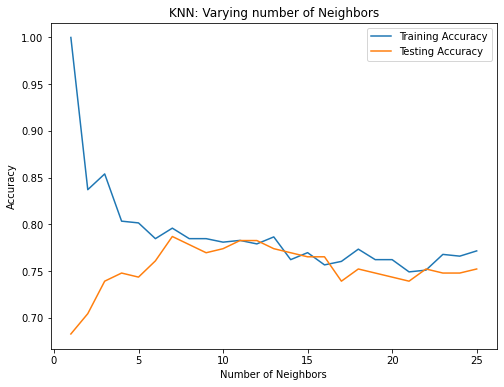

In [263]:
# plotting the result and showing the accuracy of model with different Neighbors
plt.figure(figsize=(8,6))
plt.title("KNN: Varying number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# we can clearly see peak accouracy has occured around neighbors 7
# Interpretation
# with KNN model accuracy is near 0.7869565217391304 where we have choosen some specific column to prediction.


# Function Created to calculate ROC and AUC

In [29]:
# funcrtion created to plot ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score

def rocCurveWithAUC(df):
    fpr, tpr, thresholds = roc_curve(y_test, df)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC curve')
    plt.show()
    print("ROC AUC", roc_auc_score(y_test, df))
    print("ROC Accuracy", str(roc_auc_score(y_test, df)*100))

# K-Neighbour Confusion Matrix

[[131  18]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       149
           1       0.74      0.62      0.67        81

    accuracy                           0.79       230
   macro avg       0.77      0.75      0.76       230
weighted avg       0.78      0.79      0.78       230



<AxesSubplot:>

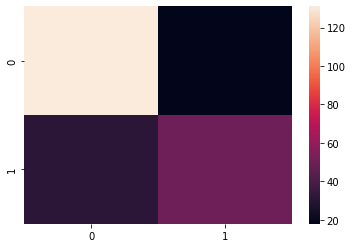

In [30]:
# How the model is good as some time it could happen that the prediction will not work at the correct time to identify the 
# fraud so before finalizing this we have to analyze this score with some other matrix.
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  
sns.heatmap(confusion_matrix(y_test, y_pred))

In [ ]:
# As per above The Model produced 131 true positive, 50 true negative, 18 false negative, and 31 false positive.
# The classification report shows a better f1 score for the zero class, which represents individuals who do not have diabetes.

# K-Neighbor ROC and AUC

In [31]:
y_pred_probs_knn = knn.predict_proba(X_test)[:, 1]
print(y_pred_probs_knn[0])

0.14285714285714285


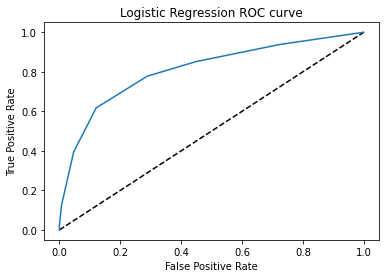

ROC AUC 0.8095534012759963
ROC Accuracy 80.95534012759963


In [32]:
rocCurveWithAUC(y_pred_probs_knn)

# SVC Supervised

In [33]:
# Support Vector Classifier Algorithm
svc = SVC(kernel = 'linear', random_state=21)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print(svc_score)

0.7608695652173914


In [35]:
y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(svc_accuracy * 100))

Accuracy: 76.08695652173914


In [ ]:
# Need to check how good is your model

# SVC Classification - Supervised Learning

[[136  13]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       149
           1       0.75      0.48      0.59        81

    accuracy                           0.76       230
   macro avg       0.76      0.70      0.71       230
weighted avg       0.76      0.76      0.75       230



<AxesSubplot:>

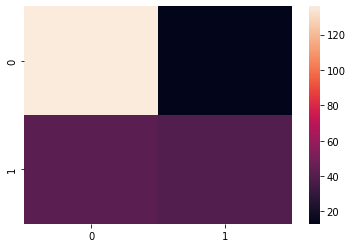

In [459]:
svc = SVC(kernel = 'linear', random_state=32)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))

# Now Fitting Simple Regression Model

In [343]:
feature = diabetes_data.drop('Glucose', axis=1)
y_outcome = diabetes_data['Glucose'].values
X_bmi = feature.iloc[:, 4].values
X_bmi = X_bmi.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_bmi, y_outcome)
predictions = reg.predict(X_bmi)
predictionOnTheBasisOfAnyHigherBmiValue = reg.predict([[330]])
print(predictionOnTheBasisOfAnyHigherBmiValue)
# Just to set the context of lineraRegression, I have choosen a very simple example from this data set where we have tried
# to analyze the dataset between glucose and bmi, here as per visualization between bmi and glucose, we have already concluded 
# that if BMI increases Glucode level is also going to increase and this has been proved while entering the max value
# under reg.predict[[330]], here bmi = 330 resulting glucose level has alo got increased.

# so lineraRegression has helped us to predict the actual value.

[427.88019666]


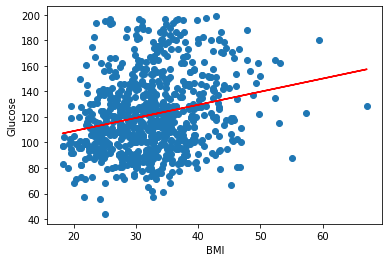

In [345]:
plt.scatter(X_bmi, y_outcome)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Glucose")
plt.xlabel("BMI")
plt.show()

In [277]:
# The red line represents the linear regression model fits glucose value against 
# the BMI which appears to have the positive correlation

# Linear Regression

In [39]:
# Now Linear Regression is using all features to predict whether patient has diabetes or not.

# Multiple Linear Regression Model : We will be using the old data which we have used in KNN Model.

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
reg_score=reg_all.score(X_train, y_train)
reg_score

0.31660043670199534

In [279]:
# clearly visible that this linear regression doesn't fit here as the score is very less so prediction will not correct

In [280]:
# After Training our model, lets look at the total error squares (margin of error) with the mean_squared_error method in 
# the scikit learn module.
# The model is provided to generate estimates by using the "x_test" set. It is then checked how close this generated prediction is to the "y_test" set.
# The number becomes readable by inserting it into the squaring function in the numpy module

mean_squared_error(y_test, y_pred, squared=False)

0.6527533657682196

# Logistic Regression

In [40]:
logistic = LogisticRegression()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=30)
logistic.fit(X_train, y_train)
logistic.score(X_train, y_train)
logis_Accuracy = logistic.predict(X_test)
logisAccuracy = accuracy_score(y_test, logis_Accuracy)
print("Accuracy: " + str(logisAccuracy * 100))

Accuracy: 78.26086956521739


# Logistic Regression Confusion Matrix

[[131  18]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       149
           1       0.74      0.62      0.67        81

    accuracy                           0.79       230
   macro avg       0.77      0.75      0.76       230
weighted avg       0.78      0.79      0.78       230



<AxesSubplot:>

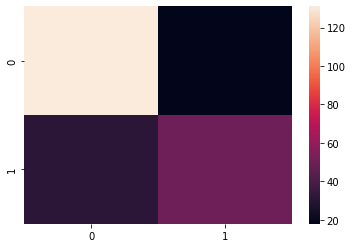

In [457]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))

# ROC Curve & AUC

In [420]:
# First Predicting probabilities by the model
y_pred_probs = logistic.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.09502725735988943


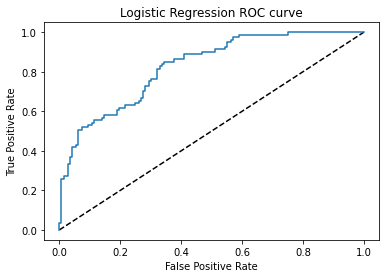

ROC AUC 0.8264147816720524
ROC Accuracy 82.64147816720524


In [427]:
# By Dfeault, logistic regression threshold = 0.5
rocCurveWithAUC(y_pred_probs)

# HyperParameter Tunning for K-Neighbors classifier

In [450]:
from sklearn.model_selection import GridSearchCV, KFold
metrics = ['euclidean','manhattan']
neighbors = np.arange(1,21)
param_grid = dict(metric=metrics, n_neighbors=neighbors)
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, scoring='accuracy', refit='True')
knn_cv.fit(X, y)
knn_val=pd.DataFrame(knn_cv.cv_results_)
knn_val.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003776,0.004702,0.003701,0.003627,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.653595,0.620915,0.647059,0.738562,0.657895,0.663605,0.039617,40
1,0.003312,0.004063,0.001840,0.003150,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.732026,0.686275,0.699346,0.725490,0.697368,0.708101,0.017567,38
2,0.001619,0.003238,0.004662,0.006339,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.732026,0.653595,0.699346,0.764706,0.703947,0.710724,0.036897,37
3,0.000000,0.000000,0.003363,0.006726,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.745098,0.673203,0.705882,0.738562,0.703947,0.713338,0.026075,36
4,0.000000,0.000000,0.006269,0.007899,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.718954,0.660131,0.732026,0.758170,0.736842,0.721225,0.033055,33


In [446]:
print(knn_cv.best_params_, knn_cv.best_score_)

{'metric': 'euclidean', 'n_neighbors': 14} 0.760500515995872


# HyperParameter Tunning for Logistic

In [454]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"solver": ["sag"]}
logistic = LogisticRegression()
log_cv = GridSearchCV(logistic, param_grid, cv=kf)
log_cv.fit(X_train, y_train)
print(log_cv.best_score_)


0.6648033856462705


C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gkora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

In [43]:
dataFrame_model_accuracy = {'Model': ['K-Neighbor', 'SVC', 'Liners Regression', 'Logistic_Regression'],
     'Accuracy' : [knn_accuracy, svc_accuracy, reg_score, logisAccuracy]}

plot_diabetes_data = pd.DataFrame(data = dataFrame_model_accuracy)
plot_diabetes_data

,Model,Accuracy
0,K-Neighbor,0.786957
1,SVC,0.760870
2,Liners Regression,0.316600
3,Logistic_Regression,0.782609


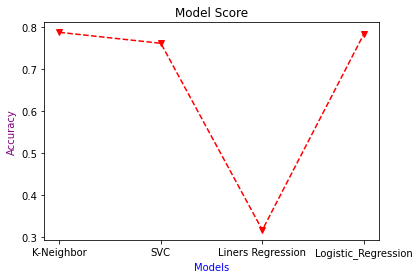

In [56]:
fig, ax=plt.subplots()
ax.plot(dataFrame_model_accuracy['Model'], dataFrame_model_accuracy['Accuracy'], marker='v', linestyle='--', color='red')
ax.set_xlabel('Models', color='blue')
ax.set_ylabel('Accuracy', color='purple')
ax.set_title('Model Score')
plt.show()

# Conclusion

In [456]:
#1. All libraries has been imported as per the requirment.
#2. imported csv file through pandas
#3. Did some manipulation of data to execute some use case, like: added NaN and 1 duplicate entry as well.
#4. Did exploratory data analysis to check the info of the data.
#5. removed NaN from the record as the occurence was very less.
#6. replaced all 0 with NaN but we have not removed the data as occurence was greater than threshold so calcualted the mean value 
   #and replace NaN
#7. Then deleted the duplicate values as well.
#8. Instead of using all data for Analysis I have chosen few columns like - 'Pregnancies','Glucose', 'Insulin','BMI','Age'
#9. Did Data Visualization before and after removing the null values. We can clearly say we are using this visualization
   #to see the changes that we can see after those 0 converted to NaN values are removed from the dataset and we can clearly see
   #the difference in BMI & Insulin etc...
#10.Also tried to create the relation in between some column data like Glucose and BMI, where when BMI is increasing Glucose
   #level is also getting increased and this theory has been proved through Linear Regression model, where after fitting the data
   #score. out of all model KNN classifier was the best algorithm to predict the best score with 0.782608695652174
#12.Now started to compare this score with matrix to identify the precision, recall and f1 score as well.
#13.Then check the performance through ROC Curve & AUC
#14.Hyper parameter Tunning has also been done to check the tunning and conclude the best parameter of our model.
